# Create and manipulate graphs

In [1]:
import graph_tool.all as gt
import numpy as np
import scipy.sparse

import matplotlib.pyplot as plt

## A simple example to create a weighted graph

We first create an empty graph object as follows. 

In [2]:
g = gt.Graph(directed=True)

This initializes a directed graph. 

Next, we define two property maps: one for assigning **weights** to edges (useful when edges represent costs, distances, or any other real-world meanings), and another for adding **labels** to the vertices so we can easily identify them by name instead of just their numeric ID.

This following line prepares the graph to store a weight value for every edge we’ll add later.

In [3]:
edge_weight = g.new_edge_property("int")

Then, we initialize a new vertex property to store a string value for every node. 

In [4]:
vertex_label = g.new_vertex_property("string")

What Is a [Property Map](https://graph-tool.skewed.de/static/docs/stable/autosummary/graph_tool.PropertyMap.html)?

In `graph-tool`, a **property map** is a core concept. Think of it as a flexible way to attach extra information — or *metadata* — to each vertex, edge, or the graph itself. 

You can use property maps to store things like:
- A label or name for a node (e.g., `"Alice"`, `"Router 3"`)
- A weight on an edge (e.g., `3.5` for distance or cost)
- A color, category, or timestamp — basically, any structured data you want to associate with graph elements

In our example, we create an integer property map, which means we’re storing simple whole numbers (like `1`, `2`, or `3`) on graph elements. This could be useful for assigning unique IDs, group numbers, or levels.

The most important takeaway is this:

> **Property maps are how `graph-tool` lets you define what kind of graph you're working with — whether it’s weighted, directed, layered, or labeled.**

They’re not just a convenience — they’re foundational to how graph-tool works.

We then add some vertices in the graph. 

In [5]:
v0 = g.add_vertex()
vertex_label[v0] = "v0"

v1 = g.add_vertex()
vertex_label[v1] = "v1"

v2 = g.add_vertex()
vertex_label[v2] = "v2"

v3 = g.add_vertex()
vertex_label[v3] = "v3"

Each call to `add_vertex()` creates one new vertex. We store them in variables (v0, v1, etc.) so we can refer to them when adding edges.

Now let’s connect these vertices with edges and assign a numeric weight to each edge.

In [6]:
e01 = g.add_edge(v0, v1)
edge_weight[e01] = 2

e12 = g.add_edge(v1, v2)
edge_weight[e12] = 1

e23 = g.add_edge(v2, v3)
edge_weight[e23] = 3

e30 = g.add_edge(v3, v0)
edge_weight[e30] = 4


Here:

- `add_edge(v0, v1)` connects two vertices.
-` edge_weight[e] = ... ` assigns a weight to that specific edge using our property map.

We then attach the `edge_weight` property map to the graph under the key "weight". This makes it easy to access later (for example, during saving, loading, or running graph algorithms).

In [7]:
g.edge_properties["weight"] = edge_weight
g.vertex_properties["label"] = vertex_label

/nb/yuanming/miniconda3/envs/gt/lib/python3.13/site-packages/graph_tool/draw/cairo_draw.py:545: UserWarning: Unknown edge attribute: text_rotation
  warnings.warn(f"Unknown {kind} attribute: " + str(k), UserWarning)


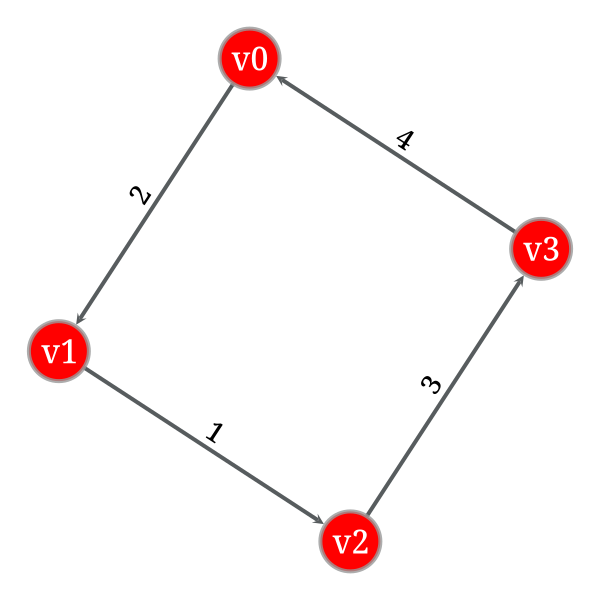

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb39ac71be0, at 0x7fb398b2fdd0>

In [8]:
gt.graph_draw(
    g,
    vertex_text=vertex_label,      # show node names
    edge_text=edge_weight,          # show edge weights
    vertex_font_size=16,
    edge_font_size=14,
    vertex_fill_color="red",
    vertex_size=30,
    vertex_pen_width=2,
    edge_pen_width=2,
    edge_text_rotation=False,
    bg_color=[1, 1, 1, 1],
    output_size=(300, 300)
)

This draws the graph. The edge weights will appear as labels along the edges.

In summary, `gt.Graph` is a general multigraph class. This class encapsulates either a directed multigraph (default or if `directed == True`) or an undirected multigraph (if `directed == False`), with optional internal edge, vertex or graph properties.

## More ways to create graphs

Graph objects do not have to be built up incrementally - data specifying graph structure can be passed directly to the constructors of the various graph classes. When creating a graph structure by instantiating one of the graph classes you can specify data in several formats.

`graph-tool`'s `Graph` object has an `add_edge_list()` method that lets you efficiently add multiple edges from a list or NumPy array. 

Suppose that we have the following directed graph: 

<img src="../figures/tikz_network.png" alt="Simple Network" width="300"/>   

### Edge list

An [edge list](https://en.wikipedia.org/wiki/Edge_list) is a data structure used to represent a graph as a list of its edges. In Python, an iterable over (source, target, weights) pairs can be used to populate the graph. 

/nb/yuanming/miniconda3/envs/gt/lib/python3.13/site-packages/graph_tool/draw/cairo_draw.py:545: UserWarning: Unknown edge attribute: font_color
  warnings.warn(f"Unknown {kind} attribute: " + str(k), UserWarning)
/nb/yuanming/miniconda3/envs/gt/lib/python3.13/site-packages/graph_tool/draw/cairo_draw.py:545: UserWarning: Unknown edge attribute: arrow_size
  warnings.warn(f"Unknown {kind} attribute: " + str(k), UserWarning)
/nb/yuanming/miniconda3/envs/gt/lib/python3.13/site-packages/graph_tool/draw/cairo_draw.py:545: UserWarning: Unknown edge attribute: marker
  warnings.warn(f"Unknown {kind} attribute: " + str(k), UserWarning)


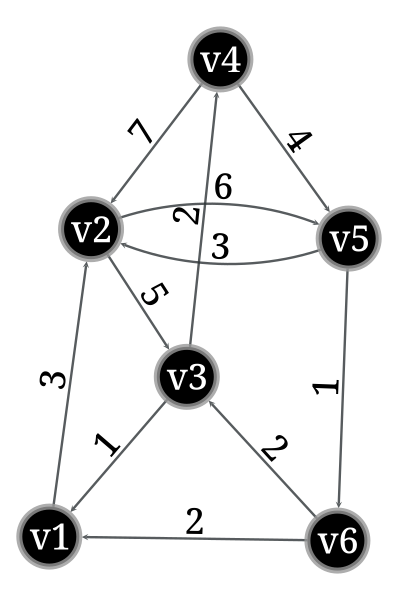

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb39bef7610, at 0x7fb398b083d0>

In [9]:
# edge list 
elist = [
    (0, 1, 3),  # v1 → v2
    (1, 2, 5),  # v2 → v3
    (2, 3, 2),  # v3 → v4
    (3, 4, 4),  # v4 → v5
    (4, 5, 1),  # v5 → v6
    (5, 0, 2),  # v6 → v1
    (1, 4, 6),  # v2 → v5
    (2, 0, 1),  # v3 → v1
    (4, 1, 3),  # v5 → v2
    (3, 1, 7),  # v4 → v2
    (5, 2, 2),  # v6 → v3
]


# Create directed graph
g = gt.Graph(directed=True)

# # Add 6 vertices
# g.add_vertex(6)

# Create edge property for weight
weight = g.new_edge_property("int")

# Add edges with weights
g.add_edge_list(elist, eprops=[weight])
g.edge_properties["weight"] = weight

# Add vertex labels (v1 to v6)
label_prop = g.new_vertex_property("string")
for i, label in enumerate(["v1", "v2", "v3", "v4", "v5", "v6"]):
    label_prop[g.vertex(i)] = label
g.vertex_properties["label"] = label_prop

# Draw the graph
gt.graph_draw(
    g,
    vertex_text=label_prop,
    edge_text=weight,
    vertex_fill_color=[0, 0, 0, 1],
    vertex_font_color=[1, 1, 1, 1],
    vertex_size=30,
    edge_pen_width=1.2,
    edge_arrow_size=15,  # Make arrows clearly visible
    edge_marker="arrow", # Ensure directed arrows
    output_size=(300, 300)
)

### Adjacency list

An [adjacency list](https://en.wikipedia.org/wiki/Adjacency_list), i.e. a dictionary with vertex keys mapping to an interable of vertices, which will be used to populate the graph. In our case, the dictionary looks like `{source: [(target, weight)]}`. 

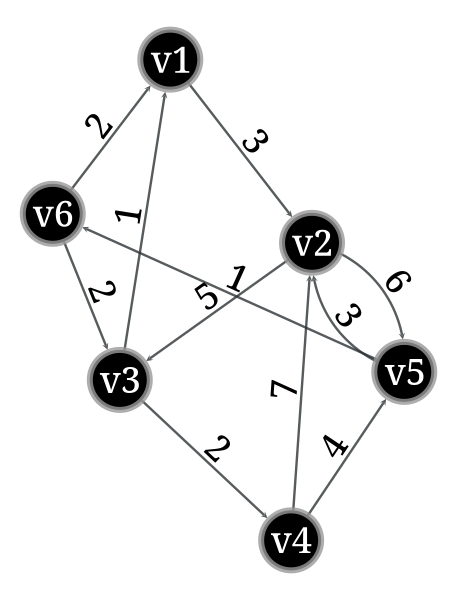

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb39bef79d0, at 0x7fb398b49e10>

In [10]:
import graph_tool.all as gt

# Step 1: Define the adjacency list
adj_list = {
    0: [(1, 3)],
    1: [(2, 5), (4, 6)],
    2: [(3, 2), (0, 1)],
    3: [(4, 4), (1, 7)],
    4: [(5, 1), (1, 3)],
    5: [(0, 2), (2, 2)]
}

# Step 2: Convert to edge list generator
def edge_generator():
    for src, targets in adj_list.items():
        for tgt, weight in targets:
            yield src, tgt, weight

# Step 3: Create graph
g = gt.Graph(directed=True)
g.add_vertex(6)  # total 6 nodes

# Step 4: Define edge property for weights
weight = g.new_edge_property("int")
g.add_edge_list(edge_generator(), eprops=[weight])
g.edge_properties["weight"] = weight

# Step 5: Add vertex labels (v1 to v6)
label_prop = g.new_vertex_property("string")
for i in range(6):
    label_prop[g.vertex(i)] = f"v{i+1}"
g.vertex_properties["label"] = label_prop

# Step 6: Draw the graph
gt.graph_draw(
    g,
    vertex_text=label_prop,
    edge_text=weight,
    vertex_fill_color=[0, 0, 0, 1],
    vertex_font_color=[1, 1, 1, 1],
    vertex_size=30,
    edge_pen_width=1.2,
    edge_arrow_size=15,
    edge_marker="arrow",
    output_size=(300, 300)
)


### Sparse Matrix

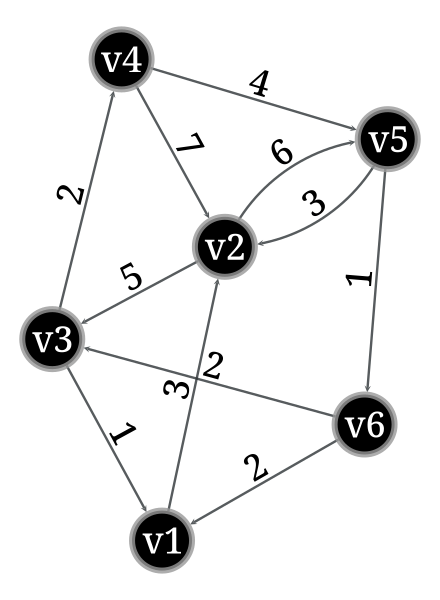

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb39bf1ad70, at 0x7fb5f42f6c80>

In [11]:
# Create a 6x6 sparse adjacency matrix (weight=1 if edge exists)
adj_matrix = np.array( [[0, 3, 0, 0, 0, 0], 
                        [0, 0, 5, 0, 6, 0], 
                        [1, 0, 0, 2, 0, 0], 
                        [0, 7, 0, 0, 4, 0], 
                        [0, 3, 0, 0, 0, 1], 
                        [2, 0, 2, 0, 0, 0]], 
                      dtype=np.int32)

# Convert to sparse COO matrix
a = scipy.sparse.coo_array(adj_matrix)

# Extract row (source), col (target), data (weight)
s, t, w = scipy.sparse.find(a)

# Combine into edge list with weights
es = np.array([s, t, w]).T  # shape: (num_edges, 3)

# Create directed graph and add edges with weights
g = gt.Graph(directed=True)

g.add_vertex(a.shape[0])
weight = g.new_edge_property("int")
g.add_edge_list(es, eprops=[weight])
g.edge_properties["weight"] = weight

# Add vertex labels
label_prop = g.new_vertex_property("string")
for i in range(6):
    label_prop[g.vertex(i)] = f"v{i+1}"

# Draw the graph
gt.graph_draw(
    g,
    vertex_text=label_prop,
    edge_text=weight,
    vertex_fill_color=[0, 0, 0, 1],
    vertex_font_color=[1, 1, 1, 1],
    vertex_size=30,
    edge_pen_width=1.2,
    edge_arrow_size=10,
    output_size=(300, 300)
)


Edge lists, adjacency lists, and adjacency matrices are all ways to represent graphs.
- **Edge List**: A list of edges, where each edge is represented as a tuple of (source, target, weight).
- **Adjacency List**: A dictionary where each key is a node and the value is a list of tuples representing the target node and weight.
- **Adjacency Matrix**: A 2D array where the element at (i, j) represents the weight of the edge from node i to node j. If there is no edge, the value is typically 0 or infinity. 

### Graph I/O (saving and loading graph)

Graph I/O in graph-tool allows for saving and loading graphs efficiently, enabling persistence, sharing, and reproducibility of graph data. Graphs can be stored in four formats: [GraphML](http://graphml.graphdrawing.org/), [DOT](https://www.graphviz.org/doc/info/lang.html), [GML](https://en.wikipedia.org/wiki/Graph_Modelling_Language), and a compact, efficient custom binary format ([.gt](https://graph-tool.skewed.de/static/docs/stable/gt_format.html#sec-gt-format)). This is particularly useful when working with large or complex networks, or when moving between stages of a workflow without recomputing graph structures or attributes.

A graph can be saved or loaded to a file with the save and load methods, which take either a file name or a file-like object. A graph can also be loaded from disc with the load_graph() function, as such:

```python
g = Graph()
#  ... fill the graph ...
g.save("my_graph.gt.gz")
g2 = load_graph("my_graph.gt.gz")
# g and g2 should be identical copies of each other
```

## Adding attributes to graphs, nodes, and edges

As we saw in the above, [property maps](https://graph-tool.skewed.de/static/docs/stable/autosummary/graph_tool.PropertyMap.html) are a way of associating additional information to the vertices, edges, or to the graph itself. There are thus three types of property maps: vertex, edge, and graph. They are handled by the classes [`VertexPropertyMap`](https://graph-tool.skewed.de/static/docs/stable/autosummary/graph_tool.VertexPropertyMap.html#graph_tool.VertexPropertyMap), [`EdgePropertyMap`](https://graph-tool.skewed.de/static/docs/stable/autosummary/graph_tool.EdgePropertyMap.html#graph_tool.EdgePropertyMap), and [`GraphPropertyMap`](https://graph-tool.skewed.de/static/docs/stable/autosummary/graph_tool.GraphPropertyMap.html#graph_tool.GraphPropertyMap). Each created property map has an associated *value type*, which must be chosen from the predefined set: 

<img src="../figures/multilayer.png" alt="Simple Network" width="300"/>   

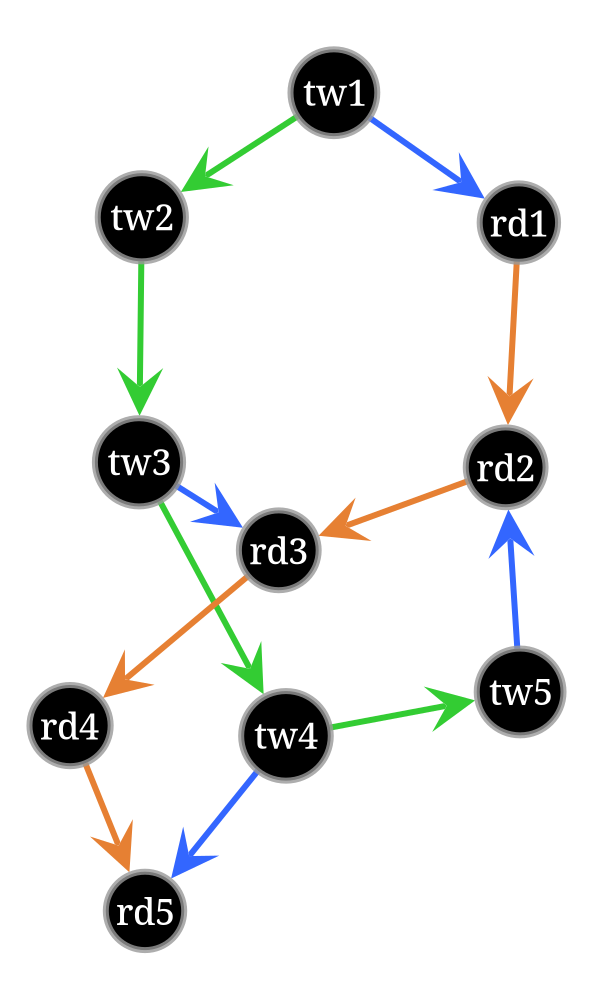

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb39bf1b100, at 0x7fb398b08130>

In [12]:
import graph_tool.all as gt

# Create a directed graph with 10 vertices
g = gt.Graph(directed=True)
g.add_vertex(10)

# Vertex properties
label = g.new_vertex_property("string")
layer = g.new_vertex_property("string")

# Assign labels and layer types
twitter = ["tw1", "tw2", "tw3", "tw4", "tw5"]
reddit = ["rd1", "rd2", "rd3", "rd4", "rd5"]

for i, name in enumerate(twitter + reddit):
    label[g.vertex(i)] = name
    layer[g.vertex(i)] = "Twitter" if i < 5 else "Reddit"

g.vertex_properties["label"] = label
g.vertex_properties["layer"] = layer

# Edge properties
edge_type = g.new_edge_property("string")
edge_color = g.new_edge_property("vector<double>")

# Define edges
edges = [
    # Intra-Twitter
    (0, 1, "intra_twitter"),
    (1, 2, "intra_twitter"),
    (2, 3, "intra_twitter"),
    (3, 4, "intra_twitter"),

    # Intra-Reddit
    (5, 6, "intra_reddit"),
    (6, 7, "intra_reddit"),
    (7, 8, "intra_reddit"),
    (8, 9, "intra_reddit"),

    # Inter-layer
    (0, 5, "inter"),
    (2, 7, "inter"),
    (4, 6, "inter"),
    (3, 9, "inter")
]

# Add edges and assign types/colors
for u, v, etype in edges:
    e = g.add_edge(u, v)
    edge_type[e] = etype
    if etype == "intra_twitter":
        edge_color[e] = [0.2, 0.8, 0.2, 1]  # green
    elif etype == "intra_reddit":
        edge_color[e] = [0.9, 0.5, 0.2, 1]  # orange
    else:  # inter
        edge_color[e] = [0.2, 0.4, 1.0, 1]  # blue

# Register properties
g.edge_properties["type"] = edge_type
g.edge_properties["color"] = edge_color

# Draw the graph
pos = gt.sfdp_layout(g)
gt.graph_draw(
    g,
    pos=pos,
    vertex_text=label,
    vertex_fill_color=[0, 0, 0, 1],
    vertex_font_color=[1, 1, 1, 1],
    edge_color=edge_color,
    edge_marker="arrow",
    edge_arrow_size=10,
    vertex_size=30,
    output_size=(500, 500)
)


## Manipulate graphs

For this section, we’ll use the [Zachary Karate Club graph](https://networks.skewed.de/net/karate) from the built-in dataset [collection](https://networks.skewed.de/).

In [13]:
g = gt.collection.ns["karate/77"]

### Adding and removing vertices and edges

Add a new vertex

In [14]:
v_new = g.add_vertex()

Add multiple vertices with 

In [15]:
g.add_vertex(n=3)  # adds 3 new vertices


<generator object Graph.add_vertex.<locals>.<genexpr> at 0x7fb39ac82dc0>

Add a new edge 

In [16]:
v0 = g.vertex(0)
e_new = g.add_edge(v0, v_new)

You can remove an edge using its descriptor:

In [17]:
g.remove_edge(e_new) 


Or get an existing one and remove it:

In [18]:
e = g.edge(0, 1)  # get the edge from vertex 0 to 1
if e is not None:
    g.remove_edge(e)

Note that removing a vertex will remove all incident edges: 

In [19]:
g.remove_vertex(v_new)

### Iterating over nodes and edges

🔁 All Vertices: 

In [20]:
for v in g.vertices():
    print(f"Vertex: {int(v)}")

Vertex: 0
Vertex: 1
Vertex: 2
Vertex: 3
Vertex: 4
Vertex: 5
Vertex: 6
Vertex: 7
Vertex: 8
Vertex: 9
Vertex: 10
Vertex: 11
Vertex: 12
Vertex: 13
Vertex: 14
Vertex: 15
Vertex: 16
Vertex: 17
Vertex: 18
Vertex: 19
Vertex: 20
Vertex: 21
Vertex: 22
Vertex: 23
Vertex: 24
Vertex: 25
Vertex: 26
Vertex: 27
Vertex: 28
Vertex: 29
Vertex: 30
Vertex: 31
Vertex: 32
Vertex: 33
Vertex: 34
Vertex: 35
Vertex: 36


🔁 All edges

In [21]:
for e in g.edges():
    print(f"Edge from {int(e.source())} to {int(e.target())}")

Edge from 0 to 2
Edge from 0 to 3
Edge from 0 to 4
Edge from 0 to 5
Edge from 0 to 6
Edge from 0 to 7
Edge from 0 to 8
Edge from 0 to 10
Edge from 0 to 11
Edge from 0 to 12
Edge from 0 to 13
Edge from 0 to 17
Edge from 0 to 19
Edge from 0 to 21
Edge from 0 to 31
Edge from 1 to 2
Edge from 1 to 3
Edge from 1 to 7
Edge from 1 to 13
Edge from 1 to 17
Edge from 1 to 19
Edge from 1 to 21
Edge from 1 to 30
Edge from 2 to 3
Edge from 2 to 7
Edge from 2 to 8
Edge from 2 to 9
Edge from 2 to 13
Edge from 2 to 27
Edge from 2 to 28
Edge from 2 to 32
Edge from 3 to 7
Edge from 3 to 12
Edge from 3 to 13
Edge from 4 to 6
Edge from 4 to 10
Edge from 5 to 6
Edge from 5 to 10
Edge from 5 to 16
Edge from 6 to 16
Edge from 8 to 30
Edge from 8 to 32
Edge from 8 to 33
Edge from 9 to 33
Edge from 13 to 33
Edge from 19 to 33
Edge from 23 to 25
Edge from 23 to 29
Edge from 25 to 24
Edge from 27 to 23
Edge from 27 to 24
Edge from 27 to 33
Edge from 28 to 33
Edge from 29 to 26
Edge from 30 to 32
Edge from 30 to 

### Iterating over all neighbors of a vertex

Let’s use vertex 0 as an example.

In [22]:
v = g.vertex(0)

# Out-neighbors (for directed graphs; works for undirected too)
for nbr in v.out_neighbors():
    print(f"Vertex 0 connects to {int(nbr)}")

# In-neighbors (only relevant for directed graphs)
for nbr in v.in_neighbors():
    print(f"{int(nbr)} connects to Vertex 0")

Vertex 0 connects to 2
Vertex 0 connects to 3
Vertex 0 connects to 4
Vertex 0 connects to 5
Vertex 0 connects to 6
Vertex 0 connects to 7
Vertex 0 connects to 8
Vertex 0 connects to 10
Vertex 0 connects to 11
Vertex 0 connects to 12
Vertex 0 connects to 13
Vertex 0 connects to 17
Vertex 0 connects to 19
Vertex 0 connects to 21
Vertex 0 connects to 31


You can also use:

In [23]:
for e in v.out_edges():
    print(f"Edge from {int(e.source())} to {int(e.target())}")

Edge from 0 to 2
Edge from 0 to 3
Edge from 0 to 4
Edge from 0 to 5
Edge from 0 to 6
Edge from 0 to 7
Edge from 0 to 8
Edge from 0 to 10
Edge from 0 to 11
Edge from 0 to 12
Edge from 0 to 13
Edge from 0 to 17
Edge from 0 to 19
Edge from 0 to 21
Edge from 0 to 31


### Faster iteration without descriptors

If you’re just dealing with integer vertex indices and don’t need full descriptors: 

In [24]:
g = gt.Graph([(0, 1), (2, 3), (2, 4)]) 

for v in g.iter_vertices():
    print(v)
for e in g.iter_edges():
    print(e)

0
1
2
3
4
[0, 1]
[2, 3]
[2, 4]


and likewise for the iteration over the neighborhood of a vertex:

In [25]:
for v in g.iter_vertices():
   for e in g.iter_out_edges(v):
       print(e)
   for w in g.iter_out_neighbors(v):
       print(w)

[0, 1]
1
[2, 3]
[2, 4]
3
4


### Fastest: loopless iteration via numpy arrays

So far, we've been using standard Python loops to iterate over the graph — which is intuitive and flexible, but not the most efficient way to process large graphs.

```python
for v in g.vertices():
    # do something
```

…you’re staying in Python land. That means you’re missing out on one of graph-tool’s biggest strengths: its C++ backend.

Just like NumPy encourages you to replace Python loops with array operations, graph-tool provides a set of **loopless, array-based methods** that let you operate directly on entire slices of the graph — fast and vectorized.

Instead of looping over vertices and calling g.vertex(i).out_degree(), just do this:

In [26]:
g = gt.collection.ns["karate/77"]

# Get the out-degrees of all vertices as a NumPy array
out_degrees = g.get_out_degrees(g.get_vertices())
print(out_degrees)

[15  8 10  6  3  4  4  4  5  2  3  1  2  5  2  2  2  2  2  3  2  2  1  5
  3  3  2  4  3  4  4  6 12 16  0  0  0]


Suppose you want to compute the sum of the product of the in-degree of the target and the out-degree of the source for all edges. Here’s how you do that efficiently:

In [27]:
g = gt.Graph([(0, 1), (2, 3), (2, 4)]) 
edges = g.get_edges()  # Nx2 array of [source, target] pairs

in_degs = g.get_in_degrees(g.get_vertices())
out_degs = g.get_out_degrees(g.get_vertices())

# Vectorized multiplication and summation
result = (out_degs[edges[:, 0]] * in_degs[edges[:, 1]]).sum()
print(result)

5
